# Numerical Integration

Teng-Jui Lin

Content adapted from UW AMATH 301, Beginning Scientific Computing, in Spring 2020.

- Numerical integration
    - First order methods
        - Left endpoint rule
        - Right endpoint rule
    - Second order methods
        - Midpoint rule
        - Trapezoidal rule
    - Fourth order method
        - Simpson's rule
    - Errors
- `scipy` implementations
    - Solving single integral by [`scipy.integrate.quad()`](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.quad.html)
    - Solving double integral by [`scipy.integrate.dblquad()`](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.dblquad.html)
    - Solving triple integral by [`scipy.integrate.tplquad()`](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.tplquad.html)
    - Reference: [`scipy.integrate` integration tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)

## Numerical integration algorithms

Suppose we have data points (or function values) with domain $[a, b]$ with $N$ equidistant intervals, so each interval has a length of $\Delta x = \dfrac{b-a}{N}$. The endpoints are named $x_0, x_1, ..., x_N$.

The left endpoint rule uses left endpoint's height to approximate the area under the curve as rectangles, having

$$
\int_a^b f(x) \ dx \approx \Delta x \sum_{k=0}^{N-1} f(x_k)
$$

The right endpoint rule uses right endpoint's height to approximate the area under the curve as rectangles, having

$$
\int_a^b f(x) \ dx \approx \Delta x \sum_{k=1}^{N} f(x_k)
$$

The midpoint rule uses the midpoint's height to approximate the area under the curve as rectangles, having

$$
\begin{aligned}
\int_a^b f(x) \ dx &\approx \Delta x \sum_{k=0}^{N-1} f \left(\dfrac{x_k + x_{k+1}}{2}\right) \\
& \approx \Delta x \sum_{i=0}^{N-1} f (\overline{x}_i)
\end{aligned}
$$

The trapezoidal rule uses the left and right endpoints' height to approximate the area under the curve as trapezoids, giving a linear approximation to the "extra area," having

$$
\int_a^b f(x) \ dx \approx \dfrac{\Delta x}{2} \left[f(x_0) + f(x_N) + \sum_{k=1}^{N-1} f(x_k)\right]
$$

Simpson's rule uses the left and right endpoints' height to approximate the area under the curve using a quadratic approximation to the "extra area" (although having same error with cubic polynomial), having

$$
\int_a^b f(x) \ dx \approx \dfrac{\Delta x}{3} \left[f(x_0) + 4f(x_1) + 2f(x_2) + \cdots + 2f(x_{N-2}) + 4f(x_{N-1}) + f(x_N)\right]
$$

Note that Simpson's rule can only have even subintervals $N$.

The local and global errors of each method is shown below:

|Method|Local Error|Global Error|
|-|-|-|
|Left endpoint rule|$\mathcal{O}(\Delta x^2)$|$\mathcal{O}(\Delta x)$|
|Right endpoint rule|$\mathcal{O}(\Delta x^2)$|$\mathcal{O}(\Delta x)$|
|Midpoint rule|$\mathcal{O}(\Delta x^3)$|$\mathcal{O}(\Delta x^2)$|
|Trapezoidal rule|$\mathcal{O}(\Delta x^3)$|$\mathcal{O}(\Delta x^2)$|
|Simpson's rule|$\mathcal{O}(\Delta x^5)$|$\mathcal{O}(\Delta x^4)$|

### Implementation

**Problem Statement.** Huskies has have weights that are normally distributed with a mean of 85 pounds and a standard deviation of 5 pounds. The probability of randomly selected Malamute having a weight between 76 and 86 pounds is

$$
P = \int_{76}^{86} \dfrac{1}{\sqrt{50\pi}}e^{-(x-85)^2 / 50} \ dx
$$

Evaluate the integral using left endpoint, right endpoint, midpoint, trapezoidal, and Simpson's rule using a spacing of $\Delta x = 0.01$. Compare result with that obtained from [`scipy.integrate.quad()`](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.quad.html). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import integrate

In [2]:
# define target function
p_density = lambda x : 1/np.sqrt(50*np.pi) * np.exp(-(x-85)**2 / 50)

In [3]:
# define parameters
left_bound = 76
right_bound = 86
dx = 0.1

In [4]:
# "exact" solution
scipy_soln = scipy.integrate.quad(p_density, left_bound, right_bound)[0]
scipy_soln

0.5433293903261772

In [5]:
# left endpoint rule
x_left = np.arange(left_bound, right_bound+dx/2, dx)
y_left = p_density(x_left)
left_soln = dx * np.sum(y_left[:-1])
left_soln

0.5402011209647617

In [6]:
# right endpoint rule
x_right = np.arange(left_bound, right_bound+dx/2, dx)
y_right = p_density(x_right)
right_soln = dx * np.sum(y_right[1:])
right_soln

0.5464429716782531

In [7]:
# midpoint rule
x_mid_ends = np.arange(left_bound, right_bound+dx/2, dx)
x_mid = (x_mid_ends[:-1] + x_mid_ends[1:])/2
y_mid = p_density(x_mid)
mid_soln = dx * np.sum(y_mid)
mid_soln

0.5433330623449413

In [8]:
# trapezoidal rule
x_trap = np.arange(left_bound, right_bound+dx/2, dx)
y_trap = p_density(x_trap)
trap_soln = dx/2 * (y_trap[0] + 2*np.sum(y_trap[1:-1]) + y_trap[-1])
trap_soln

0.5433220463215073

In [9]:
# simpson's rule
x_simps = np.arange(left_bound, right_bound+dx/2, dx)
y_simps = p_density(x_simps)
simps_soln = dx/3 * (y_simps[0] + 4*np.sum(y_simps[1:-1:2]) + 2*np.sum(y_simps[2:-2:2]) + y_simps[-1])
simps_soln

0.5433293905016291

### Order of different methods

**Problem Statement.** Huskies has have weights that are normally distributed with a mean of 85 pounds and a standard deviation of 5 pounds. The probability of randomly selected Malamute having a weight between 76 and 86 pounds is

$$
P = \int_{76}^{86} \dfrac{1}{\sqrt{50\pi}}e^{-(x-85)^2 / 50} \ dx
$$

Evaluate the integral using left endpoint, right endpoint, midpoint, trapezoidal, and Simpson's rule using different $\Delta x$. Find the order of the each method by computing errors comparing to [`scipy.integrate.quad()`](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.quad.html).

In [10]:
# define target function
p_density = lambda x : 1/np.sqrt(50*np.pi) * np.exp(-(x-85)**2 / 50)

In [11]:
# define parameters
left_bound = 76
right_bound = 86
dx = 2.0**np.arange(0, -16-0.5, -1)

In [12]:
# "exact" solution
scipy_soln = scipy.integrate.quad(p_density, left_bound, right_bound)[0]
scipy_soln

0.5433293903261772

In [13]:
# left endpoint rule
left_solns = np.zeros(len(dx))
left_error = np.zeros(len(dx))
for i in range(len(dx)):
    x_left = np.arange(left_bound, right_bound+dx[i]/2, dx[i])
    y_left = p_density(x_left)
    left_solns[i] = dx[i] * np.sum(y_left[:-1])
    left_error[i] = abs(scipy_soln - left_solns[i])

In [14]:
# right endpoint rule
right_solns = np.zeros(len(dx))
right_error = np.zeros(len(dx))
for i in range(len(dx)):
    x_right = np.arange(left_bound, right_bound+dx[i]/2, dx[i])
    y_right = p_density(x_right)
    right_solns[i] = dx[i] * np.sum(y_right[1:])
    right_error[i] = abs(scipy_soln - right_solns[i])

In [15]:
# midpoint rule
mid_solns = np.zeros(len(dx))
mid_error = np.zeros(len(dx))
for i in range(len(dx)):
    x_mid_ends = np.arange(left_bound, right_bound+dx[i]/2, dx[i])
    x_mid = (x_mid_ends[:-1] + x_mid_ends[1:])/2
    y_mid = p_density(x_mid)
    mid_solns[i] = dx[i] * np.sum(y_mid)
    mid_error[i] = abs(scipy_soln - mid_solns[i])

In [16]:
# trapezoidal rule
trap_solns = np.zeros(len(dx))
trap_error = np.zeros(len(dx))
for i in range(len(dx)):
    x_trap = np.arange(left_bound, right_bound+dx[i]/2, dx[i])
    y_trap = p_density(x_trap)
    trap_solns[i] = dx[i]/2 * (y_trap[0] + 2*np.sum(y_trap[1:-1]) + y_trap[-1])
    trap_error[i] = abs(scipy_soln - trap_solns[i])

In [17]:
# simpson's rule
simps_solns = np.zeros(len(dx))
simps_error = np.zeros(len(dx))
for i in range(len(dx)):
    x_simps = np.arange(left_bound, right_bound+dx[i]/2, dx[i])
    y_simps = p_density(x_simps)
    simps_solns[i] = dx[i]/3 * (y_simps[0] + 4*np.sum(y_simps[1:-1:2]) + 2*np.sum(y_simps[2:-2:2]) + y_simps[-1])
    simps_error[i] = abs(scipy_soln - simps_solns[i])

In [18]:
# plot settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({
    'font.family': 'Arial',  # Times New Roman, Calibri
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
    'font.size': 18,
    
    'lines.linewidth': 2,
    
    'axes.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.titleweight': 'bold',
    'axes.titlesize': 18,
    'axes.labelweight': 'bold',
    
    'xtick.major.size': 8,
    'xtick.major.width': 2,
    'ytick.major.size': 8,
    'ytick.major.width': 2,
    
    'figure.dpi': 80,
    
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.fontsize': 14
})

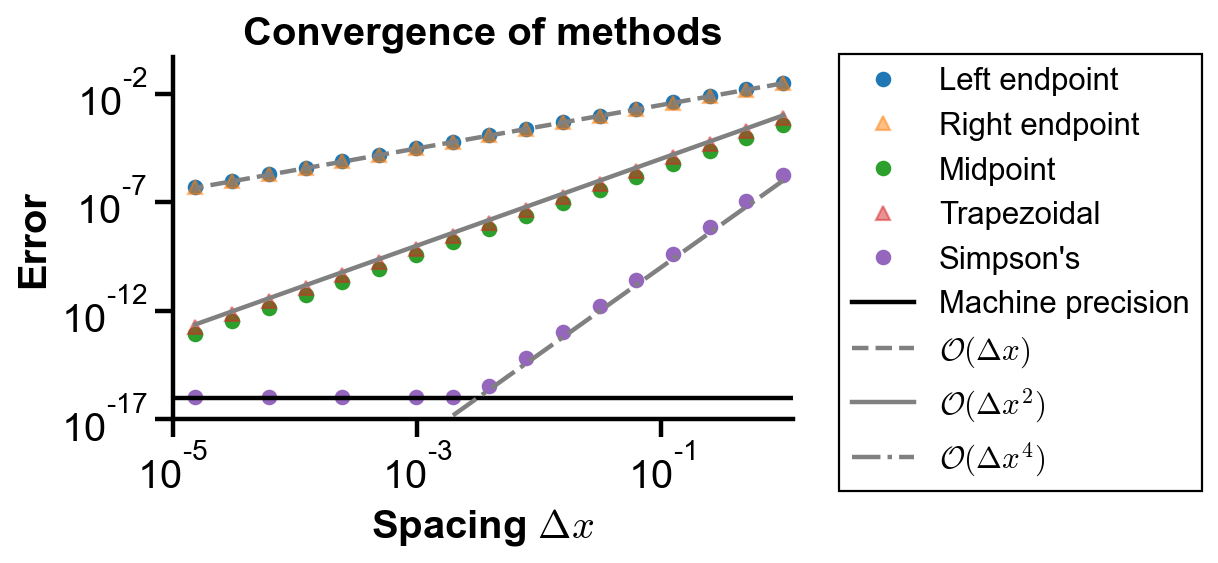

In [19]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.loglog(dx, left_error, 'o', alpha=1, label='Left endpoint')
ax.loglog(dx, right_error, '^', alpha=0.5, label='Right endpoint')
ax.loglog(dx, mid_error, 'o', alpha=1, label='Midpoint')
ax.loglog(dx, trap_error, '^', alpha=0.5, label='Trapezoidal')
ax.loglog(dx, simps_error, 'o', alpha=1, label='Simpson\'s')
ax.loglog([1e-5, 1.2], [1e-16, 1e-16], color='black', label='Machine precision')
ax.loglog(dx, 3e-2*dx, '--', alpha=1, color='gray', label='$\mathcal{O}(\Delta x)$')
ax.loglog(dx, 1e-3*dx**2, '-', alpha=1, color='gray', label='$\mathcal{O}(\Delta x^2)$')
ax.loglog(dx, 1e-6*dx**4, '-.', alpha=1, color='gray', label='$\mathcal{O}(\Delta x^4)$')
ax.set_xlabel('Spacing $\Delta x$')
ax.set_ylabel('Error')
ax.set_title('Convergence of methods')
ax.set_xlim(1e-5, 1.2)
ax.set_ylim(1e-17)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05))

## Numerical integration with `scipy.integrate`

**Problem Statement.** Find the following integrals using commands in `scipy.integrate` and compare with analytical solution.

$$
\int_{-\infty}^{\infty} e^{-x^2} \ dx = \sqrt{\pi}
$$

$$
\int_{-2}^4 \int_{0.5y^2-3}^{y+1} xy \ dx \ dy = 36
$$

$$
\int_{-2}^2 \int_{-\sqrt{4-x^2}}^{\sqrt{4-x^2}} \int_{\sqrt{x^2+y^2}}^2 (x^2 + y^2) \ dz \ dy \ dx = \dfrac{16}{5}\pi
$$

Single integral uses [`quad()`](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.quad.html); double integral uses [`dblquad()`](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.dblquad.html); triple integral uses [`tplquad()`](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.tplquad.html).

In [20]:
# single integral
func_single = lambda x : np.exp(-x**2)
lower_bound = -np.inf
upper_bound = np.inf
result_single = scipy.integrate.quad(func_single, lower_bound, upper_bound)[0]
result_single

1.7724538509055159

In [21]:
# error of single integral
analytic_single = np.sqrt(np.pi)
error_single = abs(analytic_single - result_single)
error_single

0.0

In [22]:
# double integral
func_double = lambda x, y : x*y  # order of x, y as in dx dy
x_lower = lambda y : 0.5*y**2 - 3
x_upper = lambda y : y+1
y_lower = -2
y_upper = 4
result_double = scipy.integrate.dblquad(func_double, 
                                        y_lower, y_upper, 
                                        x_lower, x_upper)[0]  # order of bounds from left to right
result_double

35.99999999999999

In [23]:
# error of double integral
analytic_double = 36
error_double = abs(analytic_double - result_double)
error_double

7.105427357601002e-15

In [24]:
# triple integral
func_triple = lambda z, y, x : x**2 + y**2  # order of z, y, x as in dz, dy, dx
x_lower = -2
x_upper = 2
y_lower = lambda x : -np.sqrt(4 - x**2)
y_upper = lambda x : np.sqrt(4 - x**2)
z_lower = lambda x, y : np.sqrt(x**2 + y**2)
z_upper = lambda x, y : 2
result_triple = scipy.integrate.tplquad(func_triple, 
                                        x_lower, x_upper, 
                                        y_lower, y_upper, 
                                        z_lower, z_upper)[0]  # order of bounds from left to right
result_triple

10.053096491479954

In [25]:
# error of triple integral
analytic_triple = 16 / 5 * np.pi
error_triple = abs(analytic_triple - result_triple)
error_triple

7.384315381386841e-12